# Data Mining / Prospecção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 2 - Clustering

## Logistics 

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `April, 18th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P2.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

## Team Identification

**GROUP NNN**

Students:

* Student 1 - n_student1
* Student 2 - n_student2
* Student 3 - n_student3

## 1. Load and Preprocess Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
import operator
import sklearn.metrics as metrics

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import OPTICS, cluster_optics_dbscan

At the end of this step you should have:
* a 76 rows × 54675 columns matrix, **X**, containing the values of the 54675 features for each of the 76 samples.
* a vector, **y**, with the 76 type of medulloblastoma, which you can use later to evaluate clustering quality.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In [7]:
#X = pd.read_csv("medulloblastoma_genes.csv")

In [8]:
#X.to_pickle("./medulloblastoma_genes.pkl")

In [9]:
X = pd.read_pickle('medulloblastoma_genes.pkl')

In [10]:
X.isna().sum().sum() #checking for null values

0

In [11]:
X.duplicated().sum() #checking for duplicated features

0

In [12]:
X.rename(columns = {'Unnamed: 0': 'samples'}, inplace = True)

In [13]:
X.samples.nunique() #there are 76 unique samples

76

In [14]:
X_samples = X.samples

In [15]:
X.drop(['samples'],axis=1, inplace=True) #removing the id

In [16]:
X.shape

(76, 54675)

In [17]:
X.head(2)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,7.59594,6.14440,4.82431,5.67092,4.14155,5.48935,6.01078,5.17671,4.83708,4.77996,...,10.2364,10.1202,11.5560,11.2308,6.94803,6.42487,6.70991,4.48639,4.43082,3.48738
1,7.80665,6.19154,5.24439,5.62149,3.41773,5.70478,5.98896,3.45316,4.34121,4.28772,...,10.4747,10.4893,11.6799,11.3475,6.09785,4.38328,4.68583,3.40120,4.20916,4.40915


In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

In [18]:
y = pd.read_csv("labels.csv")
y

,samples,class
0,GSM918578,MB-CL
1,GSM918579,MB-CL
2,GSM918580,MB-CL
3,GSM918581,MB-CL
4,GSM918582,Other
...,...,...
71,GSM918649,Other
72,GSM918650,MB-CL
73,GSM918651,Other
74,GSM918652,MB-CL


In [19]:
y_samples = y.samples

In [20]:
classes = np.unique(y_samples)
n_classes = len(classes)
print('Total number of classes = ', n_classes) #there are 76 unique values as we expect
print('Output classes = ', classes)

Total number of classes =  76
Output classes =  ['GSM918578' 'GSM918579' 'GSM918580' 'GSM918581' 'GSM918582' 'GSM918583'
 'GSM918584' 'GSM918585' 'GSM918586' 'GSM918587' 'GSM918588' 'GSM918589'
 'GSM918590' 'GSM918591' 'GSM918592' 'GSM918593' 'GSM918594' 'GSM918595'
 'GSM918596' 'GSM918597' 'GSM918598' 'GSM918599' 'GSM918600' 'GSM918601'
 'GSM918602' 'GSM918603' 'GSM918604' 'GSM918605' 'GSM918606' 'GSM918607'
 'GSM918608' 'GSM918609' 'GSM918610' 'GSM918611' 'GSM918612' 'GSM918613'
 'GSM918614' 'GSM918615' 'GSM918616' 'GSM918617' 'GSM918618' 'GSM918619'
 'GSM918620' 'GSM918621' 'GSM918622' 'GSM918623' 'GSM918624' 'GSM918625'
 'GSM918626' 'GSM918627' 'GSM918628' 'GSM918629' 'GSM918630' 'GSM918631'
 'GSM918632' 'GSM918633' 'GSM918634' 'GSM918635' 'GSM918636' 'GSM918637'
 'GSM918638' 'GSM918639' 'GSM918640' 'GSM918641' 'GSM918642' 'GSM918643'
 'GSM918644' 'GSM918645' 'GSM918646' 'GSM918647' 'GSM918648' 'GSM918649'
 'GSM918650' 'GSM918651' 'GSM918652' 'GSM918653']


In [21]:
#sanity check
(X_samples == y_samples).all()

True

In [22]:
y.drop(['samples'],axis=1, inplace=True)

In [23]:
y = y.reset_index()
y

,index,class
0,0,MB-CL
1,1,MB-CL
2,2,MB-CL
3,3,MB-CL
4,4,Other
...,...,...
71,71,Other
72,72,MB-CL
73,73,Other
74,74,MB-CL


In [24]:
y.drop('index',axis=1,inplace=True)

In [25]:
y

,class
0,MB-CL
1,MB-CL
2,MB-CL
3,MB-CL
4,Other
...,...
71,Other
72,MB-CL
73,Other
74,MB-CL


## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high when compared to the number of objects to cluster (samples). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

In [26]:
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)

low_var_df=pd.DataFrame({"names": X.columns, 
                "chi2": chi2_score,
                "chi2_p": chi_2_p_value,
                "F": f_score,
                "F_p": f_p_value,
                "MI": mut_info_score})
low_var_df    

,names,chi2,chi2_p,F,F_p,MI
0,1007_s_at,0.000031,0.995576,0.001020,0.974610,0.000000
1,1053_at,0.002047,0.963912,0.110905,0.740058,0.000000
2,117_at,0.035508,0.850535,0.374656,0.542353,0.000000
3,121_at,0.074197,0.785322,6.412725,0.013451,0.087699
4,1255_g_at,0.330042,0.565634,1.558933,0.215757,0.029754
...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,0.003399,0.953509,0.012633,0.910813,0.000000
54671,AFFX-ThrX-M_at,0.006182,0.937331,0.036528,0.848953,0.061281
54672,AFFX-TrpnX-3_at,0.001430,0.969837,0.051181,0.821645,0.000000
54673,AFFX-TrpnX-5_at,0.061542,0.804075,1.703472,0.195878,0.065880


In [27]:
X.var().sort_values() #getting the different ranges of all the features of the original dataframe X
# we need to normalize the features since they have such different ranges (the min is 0.003 and the max is  7.9)

230817_at      0.003193
239374_at      0.003290
240140_s_at    0.005129
240794_at      0.006338
1569979_at     0.007053
                 ...   
206018_at      6.088712
201909_at      6.127119
231776_at      6.322695
224588_at      7.566001
1559213_at     7.930469
Length: 54675, dtype: float64

In [28]:
scaler = MinMaxScaler()

In [29]:
X_2 = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

In [30]:
X_2.var().sort_values() #variance of the columns of X after scaling

1560035_at      0.012938
208051_s_at     0.013240
1554099_a_at    0.013303
203516_at       0.013723
218056_at       0.013998
                  ...   
231410_at       0.125159
206624_at       0.126925
224588_at       0.130306
205000_at       0.135923
1559213_at      0.137459
Length: 54675, dtype: float64

In [31]:
low_var_pd = []
for i in np.arange(X_2.var().sort_values().min(), X_2.var().sort_values().max(),0.01):
    low_var_pd.append((np.round(i,2), 
                      X_2.loc[:, X_2.var(axis=0) > np.round(i,2)].shape[1], 
                      X_2.shape[1]-X_2.loc[:, X_2.var(axis=0) > np.round(i,2)].shape[1]))

In [32]:
low_var_pd = pd.DataFrame(low_var_pd, columns=('Threshold', 'Columns Remaining', 'Columns Removed'))
low_var_pd

,Threshold,Columns Remaining,Columns Removed
0,0.01,54675,0
1,0.02,54312,363
2,0.03,49794,4881
3,0.04,37546,17129
4,0.05,23410,31265
5,0.06,13047,41628
6,0.07,6123,48552
7,0.08,2042,52633
8,0.09,447,54228
9,0.10,73,54602


<AxesSubplot:xlabel='Threshold'>

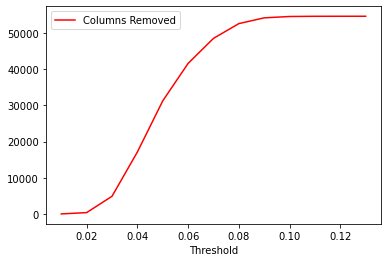

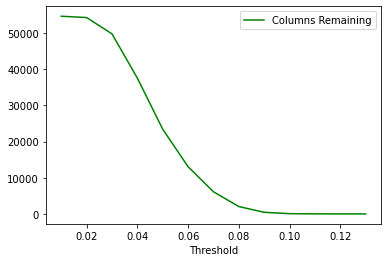

In [33]:
low_var_pd.plot.line(x='Threshold', y='Columns Removed', c='r')
low_var_pd.plot.line(x='Threshold', y='Columns Remaining', c='g')
#plots to help decide an appropriate threshold for the variance

In [34]:
X_variance = X_2.loc[:, X_2.var(axis=0) > 0.04] 
#creating X_variance with only features according to final threshold chosen of 0.04

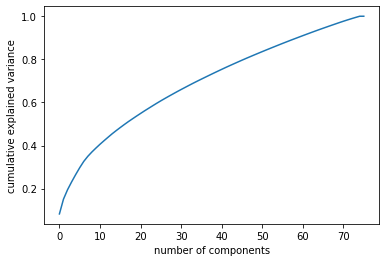

In [35]:
pca = PCA().fit(X_2) #X_train
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#the first 10 components contain approximately 50% of the variance
#we'd need about 50 components to retain 90% of the variance (we would recover most of the essential characteristics of X_train)

In [36]:
pipeline = Pipeline([('scaling', MinMaxScaler()), ('pca', PCA(0.95))])
X_PCA = pipeline.fit_transform(X)

In [37]:
print ("Components = ", pca.n_components_ )

Components =  76


- To Conclude:

In [38]:
X.shape

(76, 54675)

In [39]:
X_variance.shape

(76, 37546)

In [40]:
X_PCA.shape

(76, 67)

- There are 54675 numerical features (genes) and only 76 samples. As such, for task 2 we will perform dimensionality reduction. We don't have any information regarding to the scale in which the different genes are measured on but we will assume they are different since the variance of the features ranges from low numbers (0.003) to very high (7.9).


- Keeping in mind that a low variance feature hints that that feature lacks information and that variance is range dependent, we will be scalling the features to compare their information on the same scale before removing features with low variance.


- We have chosen MinMaxScaler method in which all features are scaled to a given range between 0 and 1 (or -1 to 1 if there are negative values).


- Additionally, we have used our own judgement to select the threshold = 0.04 to remove features with low variance - the choice was based on the analysis made backed up by the dataframe low_var_df and plots showing how many columns were to be dropped vs remaining for each of the different thresholds. The goal of dimensionality reduction is to simplify the data without losing too much information and with a threshold equal to 0.04 we still have more columns remaining than removed, from 0.05 onwards we would be removing more columns than those remanining.


- One important note would be that to choose an adquate theshold we could also check which threshold would maximize a certain algorithm's performance metric on the test set, however, for this exercise we will not be using any machine learning algorithm.


- The other dimensionality reduction technique we have applied was Principal Component Analysis which is a statistical procedure that uses an orthogonal transformation to move the original 54675 coordinates of X into a new set of 67 coordinates called principal components. 
- PCA is also sensitive to the relative scaling of the original variables of X so we will also use the normalized data X_2.


- Having decided to keep 95% of the explained variance of the original dataframe X on a new dataframe called X_PCA was created, we have reduced X dimensionality by finding a new smaller set of variables retaining most of the information on X. By allowing a loss of 5% of the original data set information, we were able to reduce the number of columns from 54675 to 67


- For this project we will be using different clustering algorithms to try to detect groups of similar samples.

## 3. Clustering Samples using Partitional Clustering

Use **`K`-means** to cluster the samples:

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. 
* Discuss the results.

In [41]:
def get_samples_per_cluster_kmeans(k, X): 
    
    """get_samples_per_cluster_kmeans gets as input the number of clusters k and the dataframe X
    and returns a dictionary for each value of K specifying how many samples MB-CL and Other are in each cluster."""
    
    labels = np.array(y['class'])
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [42]:
def get_ss_kmeans(k, X):
    """get_highest_ss_dbscan gets input a dataframe X as outputs the DBSCAN eps and min_sample parameters 
    that yield the highest SS alongside that score"""
    # Defining the list of hyperparameters to try
    k_list=np.arange(start=2, stop=k, step=1)
    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for k_element in k_list:
        kmeans = KMeans(n_clusters=k_element, random_state=0).fit(X)
        sil_score=silhouette_score(X, kmeans.fit_predict(X))
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,k_element]], columns=["SS", "K"]))
    plt.figure()
    plt.plot(silhouette_scores_data.K, silhouette_scores_data.SS)
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.xticks(range(2,k+1))
    plt.show()  
    return silhouette_scores_data

In [43]:
def comparing_ss_kmeans(k,X1, X2, X3):
    
    """comparing_ss_kmeans gets as input the number of clusters k 3 different dataframes named X1, X2 and X3
    and returns a plot with the avg SS for each of value of K for each of the 3 dataframes respectively"""
    
    slc1, slc2, slc3 = {}, {}, {}
    for k in range(2, k):
        kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
        pred_classes1 = kmeans1.labels_
        slc1[k] = silhouette_score(X1,pred_classes1)
        
        kmeans2 = KMeans(n_clusters=k, random_state=0).fit(X2)
        pred_classes2 = kmeans2.labels_
        slc2[k] = silhouette_score(X2,pred_classes2)
        
        kmeans3 = KMeans(n_clusters=k, random_state=0).fit(X3)
        pred_classes3 = kmeans3.labels_
        slc3[k] = silhouette_score(X3,pred_classes3)
        
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='X')
    plt.xticks(range(2,k+1))
    plt.legend(loc="upper right")
    plt.plot(list(slc2.keys()), list(slc2.values()), label='X_variance')
    plt.xticks(range(2,k+1))
    plt.legend(loc="upper right")
    plt.plot(list(slc3.keys()), list(slc3.values()), label='X_PCA')
    plt.xticks(range(2,k+1))
    plt.legend(loc="upper right")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

- For the original data X

In [44]:
get_samples_per_cluster_kmeans(6, X) 

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 28, 'Other': 5}
Cluster  2 {'Other': 11, 'MB-CL': 12}
For K = 4
Cluster  0 {'MB-CL': 24, 'Other': 4}
Cluster  1 {'Other': 12, 'MB-CL': 16}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8, 'Other': 2}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 3}
Cluster  1 {'MB-CL': 23, 'Other': 6}
Cluster  2 {'MB-CL': 11, 'Other': 2}
Cluster  3 {'MB-CL': 8, 'Other': 1}
Cluster  4 {'Other': 8, 'MB-CL': 6}


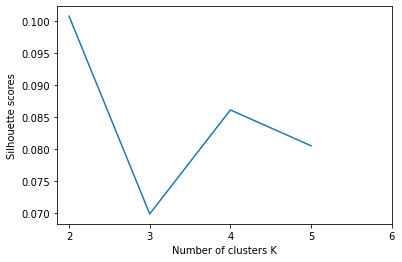

,SS,K
0,0.100814,2
0,0.069921,3
0,0.086171,4
0,0.080568,5


In [45]:
get_ss_kmeans(6,X)

- For X_variance

In [46]:
get_samples_per_cluster_kmeans(6, X_variance)

For K = 2
Cluster  0 {'MB-CL': 26, 'Other': 6}
Cluster  1 {'MB-CL': 25, 'Other': 19}
For K = 3
Cluster  0 {'MB-CL': 17, 'Other': 4}
Cluster  1 {'MB-CL': 24, 'Other': 15}
Cluster  2 {'Other': 6, 'MB-CL': 10}
For K = 4
Cluster  0 {'MB-CL': 21, 'Other': 3}
Cluster  1 {'MB-CL': 19, 'Other': 14}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8, 'Other': 1}
For K = 5
Cluster  0 {'MB-CL': 19, 'Other': 5}
Cluster  1 {'MB-CL': 8, 'Other': 1}
Cluster  2 {'Other': 8, 'MB-CL': 3}
Cluster  3 {'Other': 8, 'MB-CL': 9}
Cluster  4 {'MB-CL': 12, 'Other': 3}


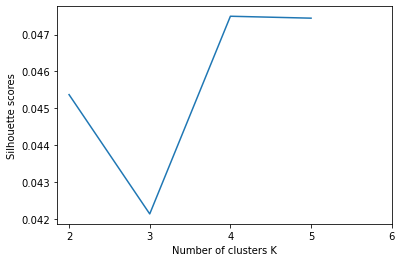

,SS,K
0,0.045373,2
0,0.042141,3
0,0.047497,4
0,0.047445,5


In [47]:
get_ss_kmeans(6,X_variance)

   - For X_PCA

In [48]:
get_samples_per_cluster_kmeans(6, X_PCA)

For K = 2
Cluster  0 {'MB-CL': 36, 'Other': 11}
Cluster  1 {'MB-CL': 15, 'Other': 14}
For K = 3
Cluster  0 {'MB-CL': 13, 'Other': 9}
Cluster  1 {'MB-CL': 21, 'Other': 4}
Cluster  2 {'Other': 12, 'MB-CL': 17}
For K = 4
Cluster  0 {'MB-CL': 29, 'Other': 6}
Cluster  1 {'Other': 9, 'MB-CL': 4}
Cluster  2 {'Other': 10, 'MB-CL': 10}
Cluster  3 {'MB-CL': 8}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 10}
Cluster  1 {'MB-CL': 13, 'Other': 4}
Cluster  2 {'Other': 8, 'MB-CL': 12}
Cluster  3 {'MB-CL': 14, 'Other': 2}
Cluster  4 {'MB-CL': 2, 'Other': 3}


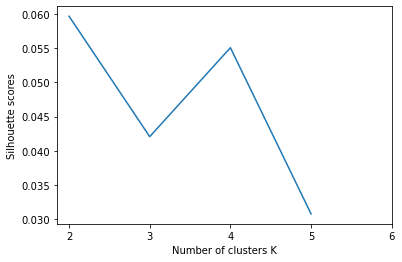

,SS,K
0,0.059684,2
0,0.042056,3
0,0.055080,4
0,0.030747,5


In [49]:
get_ss_kmeans(6,X_PCA)

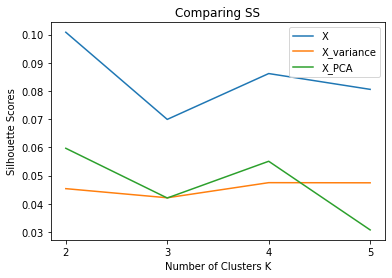

In [50]:
comparing_ss_kmeans(6,X, X_variance, X_PCA)

- Partitional clustering divides data objects into nonoverlapping groups. As such, an object can be a member of more than one cluster, and every cluster must have at least one object.

- In specific, k-means is a Hard partition algorithm which means it assigns a unique cluster value to each element in the feature space. The K-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean of the samples in the cluster.


- Silhouette score is used to evaluate the quality of clusters (how well the samples are clustered with other samples that are similar to each other) - the best value for the SS is 1 and that values near 0 indicate overlapping clusters


- For all three datasets, we observe that the SS scores are low which could hint that the samples are not well clustered with other samples that are similar to each other.


- The **best K** (the one that yieled the highest Silhouette Score) was 2 for both **X and X_PCA**. While the highest SS for X_variance was when K=4 and K=5.


- **K-means seemed to have performed better on the original dataframe X** for all the represented number of Ks in the plot, having reaching the highest SS of 0.1 when K=2 as previously mentioned. 


- The K-means algorithm aims to choose centroids minimizing a criterion known as the inertia. Inertia makes the assumption that clusters are convex and isotropic. Such low SS for all three dataframes may indicate that in fact we may be in the presence of elongated and overlapping clusters with irregular shapes (and not spherical clusters).


- As an example, with K=2 for the original dataset X we get that Cluster  0 {'MB-CL': 32, 'Other': 9} and Cluster  1 {'MB-CL': 19, 'Other': 16}, meaning that the first cluster has 32 MB-CL samples and 9 Other samples and the second cluster has 19 MB-CL samples and 16 Other samples.

## 4. Clustering Samples using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the samples: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many MB-CL and Other samples are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. 
* Discuss the results

In [51]:
def get_samples_per_cluster_hca(k, X):
    
    """get_samples_per_cluster_hca gets as input the number of clusters k and the dataframe X
    and returns a dictionary for each linkage method and for each value of K 
    specifying how many samples MB-CL and Other are in each cluster."""
    
    labels = np.array(y['class'])
    linkage = ['ward', 'complete', 'average', 'single']
    for k in range(2, k):
        print('For K =', k)
        for l in linkage:
            print('Linkage method =',l)
            clustering = AgglomerativeClustering(linkage=l, n_clusters=k).fit(X)
            pred_classes = clustering.labels_
            for i in np.array(np.unique(pred_classes)):
                print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)])))

In [52]:
def comparing_ss_hca_methods(k,X):
    
    """comparing_ss_hca_methods gets as input the number of clusters k and the dataframe X
    and returns a plot with the avg SS for each of value of K for each of the 3 linkage methods respectively"""
        
    slc1, slc2, slc3, slc4 = {}, {}, {}, {}
    for k in range(2, k):
        hca1 = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)
        pred_classes1 = hca1.labels_
        slc1[k] = silhouette_score(X,pred_classes1)

        hca2 = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
        pred_classes2 = hca2.labels_
        slc2[k] = silhouette_score(X,pred_classes2)

        hca3 = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
        pred_classes3 = hca3.labels_
        slc3[k] = silhouette_score(X,pred_classes3)
             
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='Ward method')
    plt.legend(loc="upper right")
    plt.xticks(range(2,k+1))
    plt.plot(list(slc2.keys()), list(slc2.values()), label='Complete method')
    plt.legend(loc="upper right")
    plt.xticks(range(2,k+1))
    plt.plot(list(slc3.keys()), list(slc3.values()), label='Average method')
    plt.legend(loc="upper right")
    plt.xticks(range(2,k+1))

    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

   - For X_variance

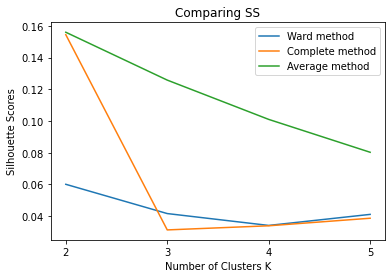

In [53]:
comparing_ss_hca_methods(6,X_variance)

In [54]:
get_samples_per_cluster_hca(6, X_variance)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 36, 'Other': 21}
Cluster  1 {'MB-CL': 15, 'Other': 4}
Linkage method = complete
Cluster  0 {'MB-CL': 49, 'Other': 25}
Cluster  1 {'MB-CL': 2}
Linkage method = average
Cluster  0 {'MB-CL': 50, 'Other': 25}
Cluster  1 {'MB-CL': 1}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 25}
Cluster  1 {'MB-CL': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 26, 'Other': 15}
Cluster  1 {'MB-CL': 15, 'Other': 4}
Cluster  2 {'Other': 6, 'MB-CL': 10}
Linkage method = complete
Cluster  0 {'Other': 16, 'MB-CL': 30}
Cluster  1 {'MB-CL': 2}
Cluster  2 {'MB-CL': 19, 'Other': 9}
Linkage method = average
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'MB-CL': 1}
Cluster  2 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'MB-CL': 1}
Cluster  2 {'Other': 1}
For K = 4
Linkage method = ward
Cluster  0 {'Other': 6, 'MB-CL': 10}
Cluster  1 {'MB-CL': 15, 'Other': 4}
Cluster  2 {'Other': 9, 'MB-CL': 11}

   - For X_PCA

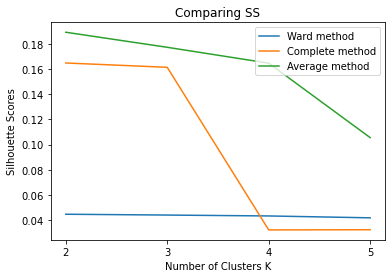

In [55]:
comparing_ss_hca_methods(6,X_PCA)

In [56]:
get_samples_per_cluster_hca(6, X_PCA)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 41, 'Other': 18}
Cluster  1 {'Other': 7, 'MB-CL': 10}
Linkage method = complete
Cluster  0 {'MB-CL': 47, 'Other': 25}
Cluster  1 {'MB-CL': 4}
Linkage method = average
Cluster  0 {'MB-CL': 49, 'Other': 25}
Cluster  1 {'MB-CL': 2}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 25}
Cluster  1 {'MB-CL': 1}
For K = 3
Linkage method = ward
Cluster  0 {'Other': 7, 'MB-CL': 10}
Cluster  1 {'MB-CL': 23, 'Other': 14}
Cluster  2 {'MB-CL': 18, 'Other': 4}
Linkage method = complete
Cluster  0 {'MB-CL': 47, 'Other': 24}
Cluster  1 {'MB-CL': 4}
Cluster  2 {'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 2}
Cluster  1 {'MB-CL': 49, 'Other': 24}
Cluster  2 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 49, 'Other': 25}
Cluster  1 {'MB-CL': 1}
Cluster  2 {'MB-CL': 1}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 23, 'Other': 14}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 18, 'Other': 4}
Cluster  3 {

- The Agglomerative Clustering performs a hierarchical clustering using a bottom up approach where each observation starts in its own cluster and clusters are successively merged together.

- The linkage criterion determines the metric used for the merge strategy, from the 
[scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html):

    *- ‘ward’ minimizes the variance of the clusters being merged.*

    *- ‘average’ uses the average of the distances of each observation of the two sets.*

    *- ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.*

    *- ‘single’ uses the minimum of the distances between all observations of the two sets.*


- For **X_variance** the best K (the one that yieled the highest SS) was 2 for all the linkage methods (distance used between sets of observation). **For all K values represented the best linkage method was the Average method** where **SS=0.16** (which uses the average of the distances of each observation) followed by the complete method (which uses the maximum distances between all observations of the two sets) when K=2 which was close to 0.16.


- As an example, with K=2 and the average method we get that Cluster 0 {'MB-CL': 50, 'Other': 25} and Cluster 1 {'MB-CL': 1}, meaning that the first cluster has 50 MB-CL samples and 25 Other samples and the second cluster has 1 MB-CL samples and 0 Other samples. Additionally, with the same K=2 and the complete method we get that Cluster 0 {'MB-CL': 49, 'Other': 25} and Cluster 1 {'MB-CL': 2}, meaning that the first cluster has 49 MB-CL samples and 25 Other samples and the second cluster has 1 MB-CL samples and 0 Other samples.


- **Comparing the SS, we see that the performance was better on X_PCA**.


- **For X_PCA the best K (the one that yieled the highest SS) was 2 for the average and complete methods**. The avg SS didn't seem to change regardless of the K number of clusters for the ward method.


- **For all K values represented the best linkage method was again the Average method** where SS=0.19 followed by the complete method when K=2 which was close to 0.17.


- We can provide a similar interpretation of the clusters formed according to the get_samples_per_cluster_hca function. For K=2 and the average method we get that Cluster 0 {'MB-CL': 49, 'Other': 25} and Cluster 1 {'MB-CL': 2}, meaning that the first cluster has 49 MB-CL samples and 25 Other samples and the second cluster has 1 MB-CL samples and 0 Other samples. This was the same cluster formation we got for X_variance when K=2 with the complete method.


## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`Medulloblastoma Type`)**.

### 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

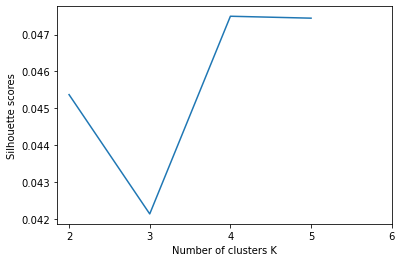

,SS,K
0,0.045373,2
0,0.042141,3
0,0.047497,4
0,0.047445,5


In [57]:
get_ss_kmeans(6,X_variance)

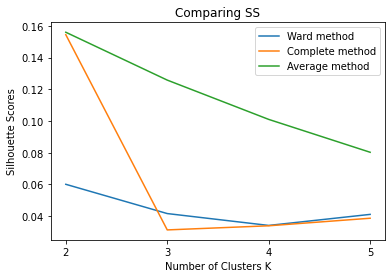

In [58]:
comparing_ss_hca_methods(6,X_variance)

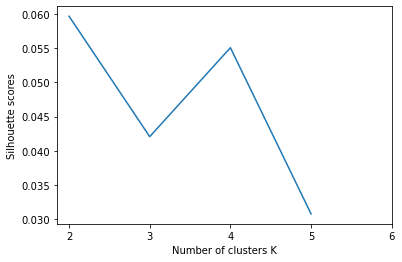

,SS,K
0,0.059684,2
0,0.042056,3
0,0.055080,4
0,0.030747,5


In [59]:
get_ss_kmeans(6,X_PCA)

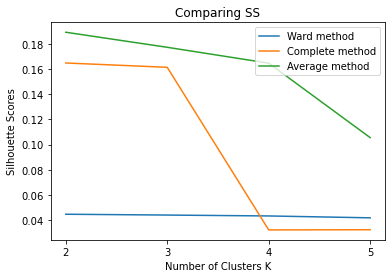

In [60]:
comparing_ss_hca_methods(6,X_PCA)

- Considering that we have been analysing the Silhouette Score for both algorithms (K-means and HCA) so far, we have chosen to continue the comparasion between algorithms for this task using the same SS metric.
- As such, we observe that **for both dataframes X_variance and X_PCA, the Hierarchical Clustering Algorithm (HCA) yieled the highest avg SS for all K clusters represented when compared to K-means.**
- In specific, for **X_variance** the highest SS was 0.16 using the HCA with the average method and k=2 while the highest SS was 0.05 when k=4 using the k-means algorithm.
- Similarly, for **X_PCA** the highest SS was 0.19 using the HCA with the average method and k=2 while the highest SS was 0.07 when k=4 using the k-means algorithm.

### 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [61]:
def comparing_kmeans_ground_truth(k,X):
    
    """comparing_kmeans_ground_truth gets as input the number of clusters k and the dataframe X
    and chooses the k that yields the highest SS using the k-means algorithm
    to then print out metrics to evaluate the predicted labels vs the true labels."""
    
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
    
    highest_ss_k = max(slc.items(), key=operator.itemgetter(1))[0]
    kmeans = KMeans(n_clusters=highest_ss_k, random_state=0).fit(X)
    labels = kmeans.labels_
    
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    #print("Adjusted Rand Index: %0.3f"
    #      % metrics.adjusted_rand_score(labels_true, labels))
    #print("Adjusted Mutual Information: %0.3f"
    #  % metrics.adjusted_mutual_info_score(labels_true, labels))

In [62]:
comparing_kmeans_ground_truth(11,X_variance)

For K = 4
Homogeneity: 0.153


In [63]:
comparing_kmeans_ground_truth(11,X_PCA)

For K = 2
Homogeneity: 0.052


In [64]:
def comparing_hca_ground_truth(k,X):
    
    """comparing_hca_ground_truth gets as input the number of clusters k and the dataframe X
    and chooses the k that yields the highest SS using the HCA
    to then print out metrics to evaluate the predicted labels vs the true labels."""
    
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        hca = AgglomerativeClustering(n_clusters=k).fit(X)
        pred_classes = hca.labels_
        slc[k] = silhouette_score(X,pred_classes)
        
    highest_ss_k = max(slc.items(), key=operator.itemgetter(1))[0]
    hca1 = AgglomerativeClustering(n_clusters=highest_ss_k).fit(X)
    labels = hca1.labels_
    
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    #print("Adjusted Rand Index: %0.3f"
    #      % metrics.adjusted_rand_score(labels_true, labels))
    #print("Adjusted Mutual Information: %0.3f"
    #  % metrics.adjusted_mutual_info_score(labels_true, labels))

In [65]:
comparing_hca_ground_truth(11,X_variance)

For K = 2
Homogeneity: 0.018


In [66]:
comparing_hca_ground_truth(11,X_PCA)

For K = 10
Homogeneity: 0.229


- Clustering helps us to analyze and get insight of the data, but the quality of the partition depends on the application of those insights/problem.

- Given the context of the task, we have chosen that the Homogeneity would be an adequate metric to evaluate the different clusters. 

- Homogeneous clustering means that each cluster contains only members of a single class. This metric ranges between 0 and 1, with low values indicating a low homogeneity.

- Ultimately, using different clustering algorithms we want to try to detect groups of similar samples and characterize them while answering questions such as "do the MB-CL gene samples actually behave differently than those classified as 'Others'?" and "do we have groups of genes behaving similarly even though the sample type is different?"

- We want to study if each cluster contains samples of a single class (whether that would be 'MB-CL' or 'Others').

- For X_variance, homogeneity was higher (0.153) with the K-means algorithm for K=2 when compared to the value of 0.052 which is a result of the HCA when K=2.

- For X_PCA, homogeneity was higher (0.229) with the HCA algorithm for K=10 when compared to the value of 0.018 which is a result of the k-means when K=2.

- Overall, the homogeneity was higher for X_PCA with the HCA algorithm for K=10 but we have to take this result carefully since 10 groups seem to be a relatively high number since so far we had know that the samples were initially divided into MB-CL and Others (with 3 subgroups inside others) - this result could be leading to a further split and "more detailed" MB sample clusters but we would want to investigate if this would be benefitial for the problem context.

## 6. Clustering Samples using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the samples.

Compare the results with those of K-means and HCA.

In [67]:
def dbscan_func(X):
    
    """dbscan_func takes as input a given dataframe X
    and returns the number of clusters and noise points for each EPS respectively"""
    
    # Defining the list of hyperparameters to try
    eps_list=np.arange(start=50, stop=150, step=10)
    min_sample_list=np.arange(start=5, stop=30, step=5)
    
    for eps_trial in eps_list:
        print('For 𝜖 =', eps_trial)
        for min_sample_trial in min_sample_list:
            db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
            n_noise_ = list(labels).count(-1) #clusters labeled w/-1  don't belong to a cluster
            print('with min_sample = ', min_sample_trial, '| Clusters =', n_clusters_, 'Noise points =', n_noise_)

In [68]:
def get_highest_ss_dbscan(X):
    """get_highest_ss_dbscan gets input a dataframe X as outputs the DBSCAN eps and min_sample parameters 
    that yield the highest SS alongside that score"""
    # Defining the list of hyperparameters to try
    eps_list=np.arange(start=50, stop=150, step=10)
    min_sample_list=np.arange(start=5, stop=30, step=5)

    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for eps_trial in eps_list:
        for min_sample_trial in min_sample_list:
            db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
            if(len(np.unique(db.fit_predict(X)))>1):
                sil_score=silhouette_score(X, db.fit_predict(X))
            else:
                continue
            trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)

            silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["Highest SS for DBSCAN", "Parameters"]))
    print(silhouette_scores_data.sort_values(by="Highest SS for DBSCAN", ascending=False).head(1))
    

In [69]:
dbscan_func(X)

For 𝜖 = 50
with min_sample =  5 | Clusters = 0 Noise points = 76
with min_sample =  10 | Clusters = 0 Noise points = 76
with min_sample =  15 | Clusters = 0 Noise points = 76
with min_sample =  20 | Clusters = 0 Noise points = 76
with min_sample =  25 | Clusters = 0 Noise points = 76
For 𝜖 = 60
with min_sample =  5 | Clusters = 0 Noise points = 76
with min_sample =  10 | Clusters = 0 Noise points = 76
with min_sample =  15 | Clusters = 0 Noise points = 76
with min_sample =  20 | Clusters = 0 Noise points = 76
with min_sample =  25 | Clusters = 0 Noise points = 76
For 𝜖 = 70
with min_sample =  5 | Clusters = 0 Noise points = 76
with min_sample =  10 | Clusters = 0 Noise points = 76
with min_sample =  15 | Clusters = 0 Noise points = 76
with min_sample =  20 | Clusters = 0 Noise points = 76
with min_sample =  25 | Clusters = 0 Noise points = 76
For 𝜖 = 80
with min_sample =  5 | Clusters = 0 Noise points = 76
with min_sample =  10 | Clusters = 0 Noise points = 76
with min_sample =  15 | C

In [70]:
dbscan_func(X_variance)

For 𝜖 = 50
with min_sample =  5 | Clusters = 0 Noise points = 76
with min_sample =  10 | Clusters = 0 Noise points = 76
with min_sample =  15 | Clusters = 0 Noise points = 76
with min_sample =  20 | Clusters = 0 Noise points = 76
with min_sample =  25 | Clusters = 0 Noise points = 76
For 𝜖 = 60
with min_sample =  5 | Clusters = 1 Noise points = 10
with min_sample =  10 | Clusters = 1 Noise points = 10
with min_sample =  15 | Clusters = 1 Noise points = 11
with min_sample =  20 | Clusters = 1 Noise points = 17
with min_sample =  25 | Clusters = 1 Noise points = 20
For 𝜖 = 70
with min_sample =  5 | Clusters = 1 Noise points = 0
with min_sample =  10 | Clusters = 1 Noise points = 0
with min_sample =  15 | Clusters = 1 Noise points = 0
with min_sample =  20 | Clusters = 1 Noise points = 0
with min_sample =  25 | Clusters = 1 Noise points = 0
For 𝜖 = 80
with min_sample =  5 | Clusters = 1 Noise points = 0
with min_sample =  10 | Clusters = 1 Noise points = 0
with min_sample =  15 | Clusters

In [71]:
dbscan_func(X_PCA)

For 𝜖 = 50
with min_sample =  5 | Clusters = 2 Noise points = 54
with min_sample =  10 | Clusters = 1 Noise points = 59
with min_sample =  15 | Clusters = 1 Noise points = 61
with min_sample =  20 | Clusters = 0 Noise points = 76
with min_sample =  25 | Clusters = 0 Noise points = 76
For 𝜖 = 60
with min_sample =  5 | Clusters = 1 Noise points = 18
with min_sample =  10 | Clusters = 1 Noise points = 20
with min_sample =  15 | Clusters = 1 Noise points = 20
with min_sample =  20 | Clusters = 1 Noise points = 20
with min_sample =  25 | Clusters = 1 Noise points = 25
For 𝜖 = 70
with min_sample =  5 | Clusters = 1 Noise points = 3
with min_sample =  10 | Clusters = 1 Noise points = 3
with min_sample =  15 | Clusters = 1 Noise points = 3
with min_sample =  20 | Clusters = 1 Noise points = 3
with min_sample =  25 | Clusters = 1 Noise points = 3
For 𝜖 = 80
with min_sample =  5 | Clusters = 1 Noise points = 0
with min_sample =  10 | Clusters = 1 Noise points = 0
with min_sample =  15 | Clusters

In [72]:
get_highest_ss_dbscan(X)

   Highest SS for DBSCAN             Parameters
0              -0.040448  eps:140 min_sample :5


In [73]:
get_highest_ss_dbscan(X_variance)

   Highest SS for DBSCAN            Parameters
0               0.096368  eps:60 min_sample :5


In [74]:
get_highest_ss_dbscan(X_PCA)

   Highest SS for DBSCAN            Parameters
0               0.188405  eps:70 min_sample :5


- We have previously seen with k-means and HCA that we need to specify the number of clusters K in order to use the algorithm, this isn't the case with DBSCAN which can be seen as an advantage of this algorithm. Additionally, clusters found by DBSCAN can be of any shape, as opposed to k-means which assumes that clusters are convex shaped as we've also covered in task 3.

- To compute DBSCAN we start from one point and the algorithm attempts to build a cluster by grouping its 𝜖−neighborhoods to check if it is a core point or not. If no such point is available, it is labeled as noise. If some are available (core points), for these points their directly reachable points are added, and we continue until we cannot reach anymore points. Then we move on to the next point that we haven't labeled yet and DBSCAN performs the same steps, until all points have been visited. By the end, we then know the cluster numbers and the noisy points.

- DBSCAN is robust to outliers and is also capable of detecting noisy points. Given this, we've tried changing the parameters of DBSCAN, in particular we have tried to find a meaningful distance threshold 𝜖 taking into consideration that DBSCAN is in fact  sensitive to scale. 

- For smaller values of 𝜖, all 76 points were being considered as noise, they weren't part of any cluster. As such, using the function *dbscan_func()* we have shown how the different   𝜖 values (starting from 50 until 150) influence the algorithm and its insights for the three different dataframes. We've also have also tried to change the minimum number of samples (depending on the density of the clusters).

- For the **original dataframe X**, until 𝜖 =  130 all points were being considered as noise. However, when For 𝜖 = 140, DBSCAN already created 1 clusters with 5 observations and left 71 observations as noise points. 

- For the reduced dataframe **X_variance**, until 𝜖 = 50, all points were being considered as noise. When 𝜖 = 50, DBSCAN considered two cluster formations of 66 samples and left 10 observations as noise points. With values higher than 60 for the 𝜖 parameter, DBSCAN based clustering was aggregating all samples into one big cluster, leaving none as noise - which for this particular problem was not a useful solution to have all 76 observations clustered into one big cluster.

- It's important to remember that both X and X_variance are high-dimensionality dataframes and that when using the DBSCAN algorithm we may be faced with the so-called 'curse of high dimensionality' making it difficult to find an appropriate value for eps. As mentioned, we have chosen the range of eps values via trial and error until we found an interval in which the DBSCAN algorithm was, in fact, separating observations and not considering all 76 points as noise points.

- Lastly, for the **X_PCA** dataframe we get one interesting insight: when 𝜖 = 50 and min_samples=5, we get that DBSCAN clusters 22 samples of the the data into two different clusters, having left 54 points as 'noise'. Increasing the 𝜖 value to 60, we observe that DBSCAN now yields 1 cluster with 58 observations and 18 noise points.

- Up until this task we had used the Silhouette score to evaluate the clustering algorithms. On key point is that the SS assumes that all points are assigned to a cluster (so there are not 'noise points') so we cannot use the SS to judge the quality of results yieled by the DBSCAN algorithm even though we have computed it through the *get_highest_ss_dbscan()* function. We have previously touched on the fact that SS assumes convex clusters, but DBSCAN does not generate convex clusters.

- We can conclude that DBSCAN algorithm's performance was worse than K-means and HCA in the sense that despite the existence of 2 labels in our original dataset (MB-CL and Others), for most 𝜖 DBSCAN uncovered only 1 cluster for all  and when it did uncover 2 clusters a high number of samples are left as 'noise points' (54 noise points for X_PCA when 𝜖 = 50 and k=2; 76 noise points for X_PCA when 𝜖 = 60 and k=2).

## 7. Choose a Different Clustering Algorithm to Group the Samples

Choose **a clustering algorithm** besides `K`-means, HCA and DBSCAN/OPTICS to cluster the samples. 

**Groups of 3 People** must choose two different algorithms.

Justify your choice and compare the results with those of `K`-means, HCA and DBSCAN/OPTICS.

In [75]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

In [76]:
def get_samples_per_cluster_mini_kmeans(k, X):
    
    """get_samples_per_cluster_mini_kmeans gets as input the number of clusters k and the dataframe X
    and returns a dictionary for each value of K specifying how many samples MB-CL and Other are in each cluster
    using the mini batch k-means algorithm"""
    
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [77]:
def get_ss_mini_kmeans(X):
    """get_highest_ss_dbscan gets input a dataframe X as outputs the DBSCAN eps and min_sample parameters 
    that yield the highest SS alongside that score"""
    # Defining the list of hyperparameters to try
    k_list=np.arange(start=2, stop=6, step=1)
    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for k in k_list:
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        sil_score=silhouette_score(X, kmeans.fit_predict(X))
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,k]], columns=["SS", "K"]))
    plt.figure()
    plt.plot(silhouette_scores_data.K, silhouette_scores_data.SS)
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.xticks(range(2,6))
    plt.show()  
    return silhouette_scores_data


In [78]:
def get_samples_per_cluster_spec(k, X):
        
    """get_samples_per_cluster_spec gets as input the number of clusters k and the dataframe X
    and returns a dictionary for each value of K specifying how many samples MB-CL and Other are in each cluster
    using the spectral clustering algorithm"""
    
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [79]:
def get_ss_spec(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.xticks(range(2,k+1))
    plt.show()  

In [80]:
def get_ss_spectural_clust(X):
    """get_highest_ss_dbscan gets input a dataframe X as outputs the DBSCAN eps and min_sample parameters 
    that yield the highest SS alongside that score"""
    # Defining the list of hyperparameters to try
    k_list=np.arange(start=2, stop=6, step=1)
    # Creating empty data frame to store the silhouette scores for each trials
    silhouette_scores_data=pd.DataFrame()

    for k in k_list:
        kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        sil_score=silhouette_score(X, kmeans.fit_predict(X))
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,k]], columns=["SS", "K"]))
    plt.figure()
    plt.plot(silhouette_scores_data.K, silhouette_scores_data.SS)
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.xticks(range(2,6))
    plt.show()  
    return silhouette_scores_data

- Mini batch K-means

- For X

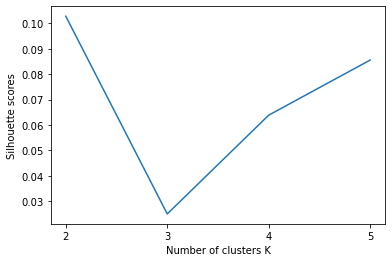

,SS,K
0,0.102785,2
0,0.024987,3
0,0.063849,4
0,0.085547,5


In [81]:
get_ss_mini_kmeans(X)

In [82]:
get_samples_per_cluster_mini_kmeans(6,X)

For K = 2
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 40, 'Other': 16}
For K = 3
Cluster  0 {'Other': 14, 'MB-CL': 17}
Cluster  1 {'MB-CL': 24, 'Other': 8}
Cluster  2 {'MB-CL': 10, 'Other': 3}
For K = 4
Cluster  0 {'MB-CL': 10, 'Other': 4}
Cluster  1 {'MB-CL': 24, 'Other': 6}
Cluster  2 {'Other': 7, 'MB-CL': 6}
Cluster  3 {'MB-CL': 11, 'Other': 8}
For K = 5
Cluster  0 {'Other': 9, 'MB-CL': 6}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 9, 'Other': 3}
Cluster  3 {'MB-CL': 25, 'Other': 6}
Cluster  4 {'MB-CL': 8}


- For X_variance

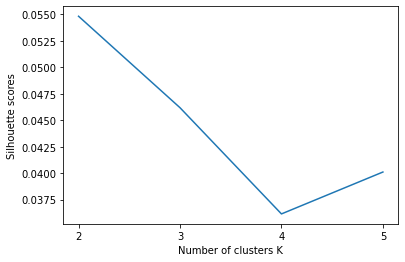

,SS,K
0,0.054831,2
0,0.046184,3
0,0.036142,4
0,0.040103,5


In [83]:
get_ss_mini_kmeans(X_variance)

In [84]:
get_samples_per_cluster_mini_kmeans(6,X_variance)

For K = 2
Cluster  0 {'MB-CL': 11, 'Other': 10}
Cluster  1 {'MB-CL': 40, 'Other': 15}
For K = 3
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 33, 'Other': 8}
Cluster  2 {'MB-CL': 17, 'Other': 17}
For K = 4
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 30, 'Other': 8}
Cluster  2 {'MB-CL': 9, 'Other': 8}
Cluster  3 {'Other': 9, 'MB-CL': 11}
For K = 5
Cluster  0 {'MB-CL': 1, 'Other': 2}
Cluster  1 {'MB-CL': 8, 'Other': 1}
Cluster  2 {'MB-CL': 32, 'Other': 15}
Cluster  3 {'Other': 7, 'MB-CL': 3}
Cluster  4 {'MB-CL': 7}


- For X_PCA

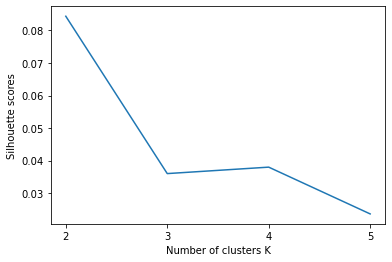

,SS,K
0,0.084334,2
0,0.036026,3
0,0.038006,4
0,0.023645,5


In [85]:
get_ss_mini_kmeans(X_PCA)

In [86]:
get_samples_per_cluster_mini_kmeans(6,X_PCA)

For K = 2
Cluster  0 {'Other': 24, 'MB-CL': 38}
Cluster  1 {'MB-CL': 13, 'Other': 1}
For K = 3
Cluster  0 {'Other': 3, 'MB-CL': 4}
Cluster  1 {'MB-CL': 21, 'Other': 4}
Cluster  2 {'MB-CL': 26, 'Other': 18}
For K = 4
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 35, 'Other': 16}
Cluster  2 {'MB-CL': 11, 'Other': 9}
Cluster  3 {'MB-CL': 4}
For K = 5
Cluster  0 {'MB-CL': 2}
Cluster  1 {'MB-CL': 15, 'Other': 3}
Cluster  2 {'Other': 11, 'MB-CL': 14}
Cluster  3 {'MB-CL': 5}
Cluster  4 {'MB-CL': 15, 'Other': 11}


- Spectural Clustering

- For X

In [87]:
warnings.filterwarnings('ignore')
get_samples_per_cluster_spec(6, X)

For K = 2
Cluster  0 {'MB-CL': 21, 'Other': 6}
Cluster  1 {'MB-CL': 30, 'Other': 19}
For K = 3
Cluster  0 {'MB-CL': 11, 'Other': 4}
Cluster  1 {'MB-CL': 15, 'Other': 12}
Cluster  2 {'MB-CL': 25, 'Other': 9}
For K = 4
Cluster  0 {'MB-CL': 12, 'Other': 8}
Cluster  1 {'Other': 10, 'MB-CL': 9}
Cluster  2 {'MB-CL': 18, 'Other': 5}
Cluster  3 {'MB-CL': 12, 'Other': 2}
For K = 5
Cluster  0 {'MB-CL': 6, 'Other': 3}
Cluster  1 {'MB-CL': 20, 'Other': 9}
Cluster  2 {'MB-CL': 14, 'Other': 8}
Cluster  3 {'MB-CL': 6, 'Other': 3}
Cluster  4 {'MB-CL': 5, 'Other': 2}


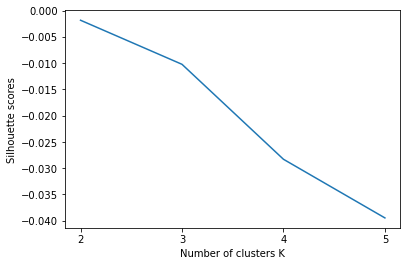

,SS,K
0,-0.001848,2
0,-0.010235,3
0,-0.028304,4
0,-0.039466,5


In [88]:
get_ss_spectural_clust(X)

- For X_variance

In [89]:
warnings.filterwarnings('ignore')
get_samples_per_cluster_spec(6, X_variance)

For K = 2
Cluster  0 {'MB-CL': 33, 'Other': 13}
Cluster  1 {'Other': 12, 'MB-CL': 18}
For K = 3
Cluster  0 {'MB-CL': 14, 'Other': 4}
Cluster  1 {'MB-CL': 26, 'Other': 11}
Cluster  2 {'MB-CL': 11, 'Other': 10}
For K = 4
Cluster  0 {'MB-CL': 17, 'Other': 10}
Cluster  1 {'MB-CL': 7, 'Other': 3}
Cluster  2 {'MB-CL': 8, 'Other': 3}
Cluster  3 {'Other': 9, 'MB-CL': 19}
For K = 5
Cluster  0 {'MB-CL': 3, 'Other': 2}
Cluster  1 {'MB-CL': 13, 'Other': 3}
Cluster  2 {'MB-CL': 11, 'Other': 6}
Cluster  3 {'Other': 4, 'MB-CL': 2}
Cluster  4 {'MB-CL': 22, 'Other': 10}


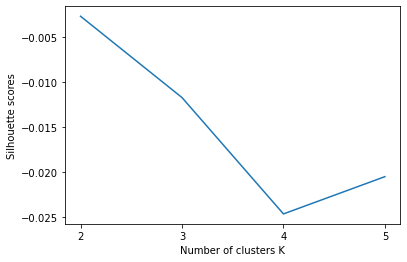

,SS,K
0,-0.002710,2
0,-0.011723,3
0,-0.024619,4
0,-0.020489,5


In [90]:
get_ss_spectural_clust(X_variance)

- For X_PCA

In [91]:
warnings.filterwarnings('ignore')
get_samples_per_cluster_spec(6, X_PCA)

For K = 2
Cluster  0 {'MB-CL': 18, 'Other': 4}
Cluster  1 {'MB-CL': 33, 'Other': 21}
For K = 3
Cluster  0 {'MB-CL': 14, 'Other': 5}
Cluster  1 {'MB-CL': 28, 'Other': 17}
Cluster  2 {'MB-CL': 9, 'Other': 3}
For K = 4
Cluster  0 {'Other': 9, 'MB-CL': 10}
Cluster  1 {'MB-CL': 12, 'Other': 4}
Cluster  2 {'MB-CL': 16, 'Other': 9}
Cluster  3 {'MB-CL': 13, 'Other': 3}
For K = 5
Cluster  0 {'MB-CL': 9, 'Other': 5}
Cluster  1 {'MB-CL': 13, 'Other': 8}
Cluster  2 {'MB-CL': 10, 'Other': 2}
Cluster  3 {'MB-CL': 7, 'Other': 6}
Cluster  4 {'MB-CL': 12, 'Other': 4}


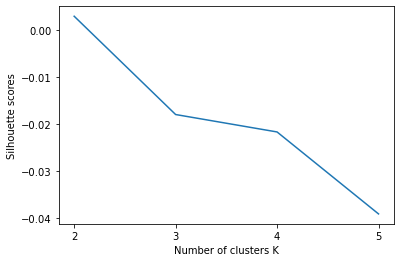

,SS,K
0,0.002885,2
0,-0.018017,3
0,-0.021724,4
0,-0.039156,5


In [92]:
get_ss_spectural_clust(X_PCA)

- The MiniBatchKMeans is a variant of the KMeans algorithm using mini-batches, random subset of the dataset, to compute the centroids.
- For the original dataframe **X**, the highest SS was 0.1 for K=2 for both K-means and Mini batch K-means. The Spectural clustering algorithm performed bad as for all the number of clusters K analysed the SS was always negative.
- For **X_variance**, the highest SS was 0.16 for K=2 with the average method of the HCA. With SS = 0.05 for K=2 with the mini batch K-means algorithm which performed better than the k-means algorithm where the highest SS was 0.047 for K=4 and K=5. The Spectural clustering algorithm had a relatively bad performance as for all the number of clusters K analysed the SS was always negative except for K=2 when SS = 0.001.
- For **X_PCA**, SS was the highest when using the HCA with the average method (SS=0.19) with K=2. Again, with K=2 the mini batch k-means performed better (SS=0.08) compared to the original k-means (SS=0.06). Similar to what we've described to far, the Spectural clustering algorithm had the worst performance being close to zero when K=2 and K=3.
- For both X_variance and X_PCA, we had already established that despite the SS that we got, the DBSCAN's performance was not good (putting all data points in one cluster for most of the parameter combinations or classifying all data points as noise). As such, we consider DBSCAN to have the worst performance out of all the algorithms analysed so far.

## 8. Conclusions

Draw some conclusions about this project work. Can you highlight some insights about meduloblastoma types? 

In [93]:
#For X_variance, the highest SS was 0.16 for K=2 with the average method of the HCA.
#For X_PCA, SS was the highest when using the HCA with the average method (SS=0.19)

Write text in cells like this...

# The Silhouette Coefficient is generally higher for convex clusters.\

We applied the discussed clustering techniques, namely: K-means, agglomerative clustering with average linkage, agglomerative clustering with complete linkage, agglomerative clustering with Ward linkage and spectral clustering. Connectivity is applied in the algorithms where it is applicable. Regarding the simple cases of separated clusters of data, all clustering algorithms perform well, as expected. Regarding uniform distribution of data, K-means, Ward agglomerative clustering and spectral clustering tend to obtain even and compact clusters, while complete linkage and average linkage agglomerative clusterings try to agglomerate as much as possible close points following the rule: “rich get richer”. This results in a second cluster of a small set of data. Regarding the embedded structures as in the case of the circles (the third row), K-means and Ward linkage agglomerative clustering try to obtain compact clusters and thus cannot separate the circles. Similar effect is observed with the moons example (the fourth row). Another fact worthful to emphasize from the illustrating example is the importance of knowing the number of clusters looked for, in the case of K-means, ward-linkage agglomerative clustering and spectral clustering, since the later also employs the K-means method. If k is not known, the average-linkage or complete-linkage agglomerative clustering is recommendable with the risk that it will not assure balanced clusters as final result.